In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb

from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt



# Load data
inputData = pd.read_csv(
    'data/train.csv', 
    nrows=100000
)

#X.to_csv("data/train.csv")
#print(X.head())
# Split into X and y

y = inputData['is_attributed']
inputData = inputData.drop(['click_time','is_attributed', 'attributed_time'], axis=1)
inputData.head()

,Unnamed: 0,ip,app,device,os,channel
0,0,83230,3,1,13,379
1,1,17357,3,1,19,379
2,2,35810,3,1,13,379
3,3,45745,14,1,13,478
4,4,161007,3,1,13,379


Counter({0: 99831, 1: 169})


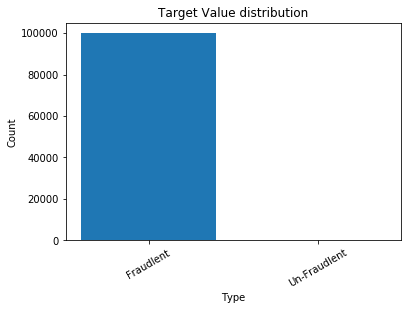

In [38]:
labels =['Fraudlent','Un-Fraudlent']
index = np.arange(len(labels))
from collections import Counter
print(Counter(y))
totalSplits = Counter(y)
values = [totalSplits[0],totalSplits[1]]
plt.bar(labels, values)
plt.xlabel('Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(index, labels, fontsize=10, rotation=30)
plt.title('Target Value distribution')
plt.show()

In [39]:
bayes_cv = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='exact'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedShuffleSplit(
        n_splits=3,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = 10,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def print_iterations(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv.best_params_)
    print('Iteration -{}\nROC-AUC Values is: {}\n params Chosen here: {}\n'.format(
        len(all_models),
        np.round(bayes_cv.best_score_, 4),
        bayes_cv.best_params_
    ))

In [40]:
result = bayes_cv.fit(inputData.values, y.values, callback=print_iterations)

Iteration -1
ROC-AUC Values is: 0.5
 params Chosen here: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.13031389926541354, 'learning_rate': 0.042815319280763466, 'max_delta_step': 13, 'max_depth': 21, 'min_child_weight': 2, 'n_estimators': 87, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216}

Iteration -2
ROC-AUC Values is: 0.8719
 params Chosen here: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, 'learning_rate': 0.7988179462781242, 'max_delta_step': 17, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134}

Iteration -3
ROC-AUC Values is: 0.8719
 params Chosen here: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.884

In [26]:
bayes_cv.best_params_

{'colsample_bylevel': 0.955923206446829,
 'colsample_bytree': 0.7036152301751524,
 'gamma': 0.03823613443879595,
 'learning_rate': 0.06786442521779147,
 'max_delta_step': 8,
 'max_depth': 11,
 'min_child_weight': 0,
 'n_estimators': 69,
 'reg_alpha': 0.00022356829889037284,
 'reg_lambda': 1.2908532337409298e-07,
 'scale_pos_weight': 4.73588486119117,
 'subsample': 0.4499578015509351}

In [41]:
xgbClass = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='exact',
    colsample_bylevel= 0.955923206446829,
 colsample_bytree= 0.7036152301751524,
 gamma= 0.03823613443879595,
 learning_rate= 0.06786442521779147,
 max_delta_step= 8,
 max_depth= 11,
 min_child_weight= 0,
 n_estimators= 69,
 reg_alpha= 0.00022356829889037284,
 reg_lambda= 1.2908532337409298e-07,
 scale_pos_weight= 4.73588486119117,
 subsample= 0.4499578015509351
    )

xgbClass.fit(inputData.values,y.values)

XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.955923206446829,
       colsample_bytree=0.7036152301751524, eval_metric='auc',
       gamma=0.03823613443879595, learning_rate=0.06786442521779147,
       max_delta_step=8, max_depth=11, min_child_weight=0, missing=None,
       n_estimators=69, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0,
       reg_alpha=0.00022356829889037284, reg_lambda=1.2908532337409298e-07,
       scale_pos_weight=4.73588486119117, seed=None, silent=1,
       subsample=0.4499578015509351, tree_method='exact')

In [42]:
X_test = pd.read_csv("C:/QuoraQuestion/test.csv/test.csv",parse_dates=['click_time'])
print(X_test.head())
x_test_1 = X_test.drop(['click_time'], axis=1)
results_1 =xgbClass.predict(x_test_1.values)
Counter(results_1)
#x_test_1.head()

   click_id      ip  app  device  os  channel          click_time
0         0    5744    9       1   3      107 2017-11-10 04:00:00
1         1  119901    9       1   3      466 2017-11-10 04:00:00
2         2   72287   21       1  19      128 2017-11-10 04:00:00
3         3   78477   15       1  13      111 2017-11-10 04:00:00
4         4  123080   12       1  13      328 2017-11-10 04:00:00


Counter({0: 18774980, 1: 15489})